In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
import matplotlib as mpl
plt.style.use(r'F:\DATA_F\JPCB_fig_publish_svg\publish.mplstyple')

In [3]:
target_dir=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir)
full_df=pd.read_csv('Disprot_DP_entropic_force.csv')
ref_df=pd.read_csv('Disprot_DP_ensemble_data.csv')
full_df_gs=pd.read_csv('GS_linker_entropic_force.csv')
ref_df_gs=pd.read_csv('GS_linker_ensemble_data.csv')
full_df_NDK=pd.read_csv('UGDH_entropic_force.csv')
ref_df_NDK=pd.read_csv('UGDH_ensemble_data.csv')
full_df_puma=pd.read_csv('PUMA_entropic_force.csv')
ref_df_puma=pd.read_csv('PUMA_ensemble_data.csv')
uniprot=pd.read_csv('Table_Uniprot.csv')

In [4]:
datatype=['ee','rg','HB','helix','beta','asphericity']
datatype_name=['Ree','Rg','H-bonds','Helicity','Beta-Sheet','Asphericity']
solution=[-3,-2,-1,0,1,2,3]
solution_name=['m3','m2','m1','buffer','p1','p2','p3']
features=['kappa','FCR','NCPR','kappa_IL','kappa_QN','kappa_YF']
features_other=['kappa','FCR','NCPR']

In [5]:
datatype_dict=dict(zip(datatype,datatype_name))
solution_dict=dict(zip(solution,solution_name))

In [6]:
datatype_dict.items()

dict_items([('ee', 'Ree'), ('rg', 'Rg'), ('HB', 'H-bonds'), ('helix', 'Helicity'), ('beta', 'Beta-Sheet'), ('asphericity', 'Asphericity')])

In [7]:
ref_df['dataset']='DisProt'
ref_df_gs['dataset']='GS'
ref_df_NDK['dataset']='UGDH'
ref_df_puma['dataset']='PUMA'

In [8]:
full_df['dataset']='DisProt'
full_df_gs['dataset']='GS'
full_df_NDK['dataset']='UGDH'
full_df_puma['dataset']='PUMA'

In [9]:
ls_disprot=[]
for name, group in ref_df.groupby(by=['Protein']):
    df_dict={}
    df_dict['protein']=name
    df_dict['sequence']=group[group['datatype']=='feature']['Sequence'].item()
    df_dict['length']=group[group['datatype']=='feature']['length'].item()
    df_dict['dataset']=group[group['datatype']=='feature']['dataset'].item()
    if name in uniprot['Protein'].to_list():
        df_dict['Uniprot']=uniprot[uniprot['Protein']==name]['Uniprot'].item()
        df_dict['location_in_Uniprot']=uniprot[uniprot['Protein']==name]['location'].item()
    else:
        df_dict['Uniprot']=np.NaN
        df_dict['location_in_Uniprot']=np.NaN
    for index2,j in enumerate(solution):
        df_dict['_'.join(['frame_number'
                        ,solution_name[index2]])]=group[(group['datatype']=='ee')
                                                       &(group['prot_solv_inter']==j)]['frame_counts'].item()
        for index,i in enumerate(datatype):
            df_dict['_'.join([datatype_name[index]
                            ,solution_name[index2]
                    ,'value'])]=group[(group['datatype']==i)
                                    &(group['prot_solv_inter']==j)]['value'].item()
            df_dict['_'.join([datatype_name[index]
                            ,solution_name[index2]
                    ,'std'])]=group[(group['datatype']==i)
                                  &(group['prot_solv_inter']==j)]['Std'].item()
    for k in features:
        df_dict[k]=group[group['datatype']=='feature'][k].item()
    ls_disprot.append(df_dict)
df_disprot=pd.DataFrame(ls_disprot)

In [10]:
df_disprot['location_in_Uniprot'].replace(-1,np.NaN,inplace=True)
df_disprot['location_in_Uniprot']+=1

In [11]:
def generate_df(df):
    ls=[]
    for name, group in df.groupby(by=['Protein']):
        df_dict={}
        df_dict['protein']=name
        df_dict['sequence']=group[group['datatype']=='feature']['Sequence'].item()
        df_dict['length']=group[group['datatype']=='feature']['length'].item()
        df_dict['dataset']=group[group['datatype']=='feature']['dataset'].item()
        if name in uniprot['Protein'].to_list():
            df_dict['Uniprot']=uniprot[uniprot['Protein']==name]['Uniprot'].item()
        else:
            df_dict['Uniprot']='nan'
        for index2,j in enumerate(solution):
            df_dict['_'.join(['frame_number'
                            ,solution_name[index2]])]=group[(group['datatype']=='ee')
                                                           &(group['prot_solv_inter']==j)]['frame_counts'].item()
            for index,i in enumerate(datatype):
                df_dict['_'.join([datatype_name[index]
                                ,solution_name[index2]
                        ,'value'])]=group[(group['datatype']==i)
                                        &(group['prot_solv_inter']==j)]['value'].item()
                df_dict['_'.join([datatype_name[index]
                                ,solution_name[index2]
                        ,'std'])]=group[(group['datatype']==i)
                                      &(group['prot_solv_inter']==j)]['Std'].item()
        ls.append(df_dict)
    return pd.DataFrame(ls)

In [12]:
df_test=pd.concat([df_disprot,generate_df(ref_df_gs),generate_df(ref_df_puma)])

In [13]:
protein='A1LCD'
condition=1
condition2='p1'
data='rg'
data2='Rg'

In [14]:
v1=ref_df[(ref_df['Protein']==protein)&(ref_df['prot_solv_inter']==condition)&(ref_df['datatype']==data)]['value']
v2=df_test[df_test['protein']==protein]['_'.join([data2,condition2,'value'])]

In [15]:
print('Test Case protein {}'.format(protein))
print('Solution condition 1 {}, 2 {}'.format(condition,condition2))
print('Datatype 1 {}, 2 {}'.format(data,data2))
if v1.item()==v2.item():
    print('Correct v1={}, v2={}'.format(v1.item(),v2.item()))
else:
    print('Wrong v1={}, v2={}'.format(v1.item(),v2.item()))

Test Case protein A1LCD
Solution condition 1 1, 2 p1
Datatype 1 rg, 2 Rg
Correct v1=2.024116545099813, v2=2.024116545099813


## Entropic df

In [16]:
d_t_pair=full_df.groupby(['distance','theta']).size().reset_index().drop(columns=0).to_numpy().tolist()

In [17]:
d_t_dict={}
for i in d_t_pair:
    if i[0]==0:
        d_t_dict[tuple(i)]=('0',str(int(i[1])))
    else:
        d_t_dict[tuple(i)]=(str(i[0]),str(int(i[1])))

In [18]:
d_t_dict

{(0.0, 1.0): ('0', '1'),
 (0.0, 30.0): ('0', '30'),
 (0.0, 60.0): ('0', '60'),
 (0.2, 1.0): ('0.2', '1'),
 (0.2, 30.0): ('0.2', '30'),
 (0.5, 1.0): ('0.5', '1')}

In [19]:
def generate_entropy_df(df):
    ls=[]
    dataset=df['dataset'].unique()[0]
    for name, group in df.groupby(by=['Protein']):
        df_dict={}
        df_dict['protein']=name
        df_dict['dataset']=dataset
        for key2,j in solution_dict.items():
            for key1,i in d_t_dict.items():
                df_dict['_'.join(['OmegaT/OmegaU','d',i[0],'t',i[1]
                                ,'solution',j])]=group[(group['distance']==key1[0])
                                        &(group['theta']==key1[1])
                                        &(group['prot_solv_inter']==key2)]['OmegaT/OmegaU'].item()
        ls.append(df_dict)
    df_ds=pd.DataFrame(ls)
    for key,i in solution_dict.items():
        DS_column_name=["OmegaT/OmegaU_d_{}_t_{}_solution_{}".format(x[0],x[1],i) for x in d_t_dict.values()]
        df_ds['_'.join(['DS/k',i])]=np.log(df_ds[DS_column_name].mean(axis=1))
    return df_ds
    

In [20]:
df_entropy_test=pd.concat([generate_entropy_df(full_df),generate_entropy_df(full_df_gs),generate_entropy_df(full_df_puma)])

In [21]:
df_test.merge(df_entropy_test,on=['protein','dataset'],how='inner')

,protein,sequence,length,dataset,Uniprot,location_in_Uniprot,frame_number_m3,Ree_m3_value,Ree_m3_std,Rg_m3_value,...,OmegaT/OmegaU_d_0.2_t_1_solution_p3,OmegaT/OmegaU_d_0.2_t_30_solution_p3,OmegaT/OmegaU_d_0.5_t_1_solution_p3,DS/k_m3,DS/k_m2,DS/k_m1,DS/k_buffer,DS/k_p1,DS/k_p2,DS/k_p3
0,A1LCD,GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG...,137.0,DisProt,P09651,NaN,28000.0,2.436023,0.738622,1.787628,...,0.118679,0.174756,0.166851,-3.278427,-4.197723,-3.178959,-2.411656,-2.948720,-2.119966,-1.944196
1,Ash1,GASASSSPSPSTPTKSGKMRSRSSSPVRPKAYTPSPRSPNYHRFAL...,83.0,DisProt,P34233,NaN,28000.0,5.382038,0.448216,2.514507,...,0.148917,0.224619,0.209667,-2.038726,-1.915832,-1.813926,-1.740897,-1.729333,-1.701277,-1.694077
2,At1g54410_dehydrin,MAGLINKIGDALHIGGGNKEGEHKKEEEHKKHVDEHKSGEHKEGIV...,98.0,DisProt,Q9SLJ2,1.0,28050.0,6.006053,0.955006,2.642162,...,0.115404,0.159901,0.167053,-3.619747,-3.870143,-3.118171,-2.418984,-2.282233,-2.127918,-2.013296
3,At2g23120_PvLEA18,MEAGKTPPTTTTTTEKKTEQVKDNDLPTDSPYMATGTLEDYKLKAY...,83.0,DisProt,Q8S8R1,1.0,28023.0,4.266047,0.280709,1.889285,...,0.196531,0.220141,0.246983,-1.999341,-1.919374,-1.871162,-1.711624,-1.671281,-1.630154,-1.609898
4,At2g40170_LEA_5,MASQQEKKQLDERAKKGETVVPGGTGGKSFEAQQHLAEGRSRGGQT...,92.0,DisProt,Q02973,1.0,28066.0,3.901512,0.164235,1.813904,...,0.162477,0.246993,0.224978,-3.724069,-3.531038,-2.608973,-2.098628,-1.746163,-1.628027,-1.598387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,puma_scramble_96,EADEIEEREQRVIRWHGAADLENAEQLRERRQYQ,34.0,PUMA,nan,NaN,16824.0,1.981744,0.174661,1.125905,...,0.250743,0.386789,0.362815,-1.185164,-1.142895,-1.122457,-1.128369,-1.143122,-1.162332,-1.166034
193,puma_scramble_97,LVHRNIEGRAYEREAIRQLDDQEQEREREQAEWA,34.0,PUMA,nan,NaN,16802.0,0.934274,0.038789,0.994616,...,0.202201,0.333343,0.298661,-4.622971,-2.869607,-3.339520,-2.393978,-1.780167,-1.434112,-1.315974
194,puma_scramble_98,QWEIYEHQQRINAADLRDGARREEEERQLAVREE,34.0,PUMA,nan,NaN,16152.0,2.128603,0.485679,1.173920,...,0.230207,0.351234,0.334383,-2.216888,-1.789345,-1.539953,-1.472751,-1.431345,-1.333629,-1.262395
195,puma_scramble_99,RRRHLNEQQYERIEAEAIEEDRWVAERQQADGEL,34.0,PUMA,nan,NaN,16812.0,1.407010,0.312577,0.955743,...,0.156480,0.266312,0.243215,-1.902884,-1.825818,-1.488993,-1.545318,-1.543846,-1.564211,-1.572269


In [22]:
'''
full_ls_disprot=[]
dataset=full_df['dataset'].unique()[0]
for name, group in full_df.groupby(by=['Protein']):
    df_dict={}
    df_dict['protein']=name
    df_dict['dataset']=dataset
    for key2,j in solution_dict.items():
        for key1,i in d_t_dict.items():
            df_dict['_'.join(['OmegaT/OmegaU','d',i[0],'t',i[1]
                            ,'solution',j])]=group[(group['distance']==key1[0])
                                    &(group['theta']==key1[1])
                                    &(group['prot_solv_inter']==key2)]['OmegaT/OmegaU'].item()
    full_ls_disprot.append(df_dict)
df_disprot_test=pd.DataFrame(full_ls_disprot)
for key,i in solution_dict.items():
    DS_column_name=["OmegaT/OmegaU_d_{}_t_{}_solution_{}".format(x[0],x[1],i) for x in d_t_dict.values()]
    df_disprot_test['_'.join(['DS/k',i])]=np.log(df_disprot_test[DS_column_name].mean(axis=1))
test=df_test[df_test['dataset']=='DisProt'].merge(df_disprot_test,on=['protein','dataset'],how='inner')
plt.scatter(test['length'],test['DS/k_buffer'],s=200,facecolors='None',edgecolor='red',linewidth=3)    
plt.xlim(0,200)
plt.ylabel('$\Delta S/k_B$ ')
plt.locator_params(axis='x',nbins=5)
plt.xlabel('number of residues')
'''

'\nfull_ls_disprot=[]\ndataset=full_df[\'dataset\'].unique()[0]\nfor name, group in full_df.groupby(by=[\'Protein\']):\n    df_dict={}\n    df_dict[\'protein\']=name\n    df_dict[\'dataset\']=dataset\n    for key2,j in solution_dict.items():\n        for key1,i in d_t_dict.items():\n            df_dict[\'_\'.join([\'OmegaT/OmegaU\',\'d\',i[0],\'t\',i[1]\n                            ,\'solution\',j])]=group[(group[\'distance\']==key1[0])\n                                    &(group[\'theta\']==key1[1])\n                                    &(group[\'prot_solv_inter\']==key2)][\'OmegaT/OmegaU\'].item()\n    full_ls_disprot.append(df_dict)\ndf_disprot_test=pd.DataFrame(full_ls_disprot)\nfor key,i in solution_dict.items():\n    DS_column_name=["OmegaT/OmegaU_d_{}_t_{}_solution_{}".format(x[0],x[1],i) for x in d_t_dict.values()]\n    df_disprot_test[\'_\'.join([\'DS/k\',i])]=np.log(df_disprot_test[DS_column_name].mean(axis=1))\ntest=df_test[df_test[\'dataset\']==\'DisProt\'].merge(df_disprot

In [23]:
protein='A1LCD'
condition=1
condition2='p1'
distance=0.2
distance2='0.2'
theta=30
theta2='30'

In [24]:
v1=full_df[(full_df['Protein']==protein)&(full_df['prot_solv_inter']==condition)&(full_df['distance']==distance)&(full_df['theta']==theta)]['OmegaT/OmegaU']
v2=df_entropy_test[df_entropy_test['protein']==protein]['_'.join(['OmegaT/OmegaU','d',distance2,'t',theta2,'solution',condition2])]

In [25]:
print('Test Case protein {}'.format(protein))
print('Solution condition 1 {}, 2 {}'.format(condition,condition2))
print('Distance 1 {}, 2 {}'.format(distance,distance2))
print('Theta 1 {}, 2 {}'.format(theta,theta2))
if v1.item()==v2.item():
    print('Correct v1={}, v2={}'.format(v1.item(),v2.item()))
else:
    print('Wrong v1={}, v2={}'.format(v1.item(),v2.item()))

Test Case protein A1LCD
Solution condition 1 1, 2 p1
Distance 1 0.2, 2 0.2
Theta 1 30, 2 30
Correct v1=0.0699107142857142, v2=0.0699107142857142


In [26]:
## UGDH do not have the solution space scanning so we need to manually modify part of the function

In [27]:
datatype_ugdh=['ee','rg','HB','helix','beta']
datatype_name_ugdh=['Ree','Rg','H-bonds','Helicity','Beta-Sheet']
solution_ugdh=[0]
solution_name_ugdh=['buffer']
features_other=['kappa','FCR','NCPR']
datatype_dict_ugdh=dict(zip(datatype_ugdh,datatype_name_ugdh))
solution_dict_ugdh=dict(zip(solution_ugdh,solution_name_ugdh))

In [28]:
ls_ugdh=[]
for name, group in ref_df_NDK.groupby(by=['Protein']):
    df_dict={}
    df_dict['protein']=name
    df_dict['sequence']=group[group['datatype']=='feature']['Sequence'].item()
    df_dict['length']=group[group['datatype']=='feature']['length'].item()
    df_dict['dataset']=group[group['datatype']=='feature']['dataset'].item()
    if name in uniprot['Protein'].to_list():
        df_dict['Uniprot']=uniprot[uniprot['Protein']==name]['Uniprot'].item()
    else:
        df_dict['Uniprot']='nan'
    for index2,j in enumerate(solution_ugdh):
        df_dict['_'.join(['frame_number'
                        ,solution_name_ugdh[index2]])]=group[(group['datatype']=='ee')
                                                       &(group['prot_solv_inter']==j)]['frame_counts'].item()
        for index,i in enumerate(datatype_ugdh):
            df_dict['_'.join([datatype_name_ugdh[index]
                            ,solution_name_ugdh[index2]
                    ,'value'])]=group[(group['datatype']==i)
                                    &(group['prot_solv_inter']==j)]['value'].item()
            df_dict['_'.join([datatype_name_ugdh[index]
                            ,solution_name_ugdh[index2]
                    ,'std'])]=group[(group['datatype']==i)
                                  &(group['prot_solv_inter']==j)]['Std'].item()
    ls_ugdh.append(df_dict)
df_ugdh=pd.DataFrame(ls_ugdh)

In [29]:
ugdh_ls_disprot=[]
dataset=full_df_NDK['dataset'].unique()[0]
for name, group in full_df_NDK.groupby(by=['Protein']):
    df_dict={}
    df_dict['protein']=name
    df_dict['dataset']=dataset
    for key2,j in solution_dict_ugdh.items():
        for key1,i in d_t_dict.items():
            df_dict['_'.join(['OmegaT/OmegaU','d',i[0],'t',i[1]
                            ,'solution',j])]=group[(group['distance']==key1[0])
                                    &(group['theta']==key1[1])
                                    &(group['prot_solv_inter']==key2)]['OmegaT/OmegaU'].item()
    ugdh_ls_disprot.append(df_dict)
df_entropy_ugdh=pd.DataFrame(ugdh_ls_disprot)
for key,i in solution_dict_ugdh.items():
    DS_column_name=["OmegaT/OmegaU_d_{}_t_{}_solution_{}".format(x[0],x[1],i) for x in d_t_dict.values()]
    df_entropy_ugdh['_'.join(['DS/k',i])]=np.log(df_entropy_ugdh[DS_column_name].mean(axis=1))

In [30]:
df_ugdh.merge(df_entropy_ugdh)

,protein,sequence,length,dataset,Uniprot,frame_number_buffer,Ree_buffer_value,Ree_buffer_std,Rg_buffer_value,Rg_buffer_std,...,Helicity_buffer_std,Beta-Sheet_buffer_value,Beta-Sheet_buffer_std,OmegaT/OmegaU_d_0_t_1_solution_buffer,OmegaT/OmegaU_d_0_t_30_solution_buffer,OmegaT/OmegaU_d_0_t_60_solution_buffer,OmegaT/OmegaU_d_0.2_t_1_solution_buffer,OmegaT/OmegaU_d_0.2_t_30_solution_buffer,OmegaT/OmegaU_d_0.5_t_1_solution_buffer,DS/k_buffer
0,0.33fl,KVSSKRIPYA,10.0,UGDH,nan,28000.0,1.547693,0.023156,0.788819,0.004120,...,0.004171,0.015857,0.008366,0.226476,0.523667,0.719107,0.376690,0.659232,0.597869,-0.659377
1,0.5fl,KVSSKRIPYAPSGEI,15.0,UGDH,nan,28000.0,1.830348,0.017365,0.933190,0.004664,...,0.005411,0.019060,0.005827,0.168863,0.402244,0.561292,0.288512,0.522548,0.479887,-0.906611
2,2fl,KVSSKRIPYAPSGEIPKFSLQDPPNKKPKVKVSSKRIPYAPSGEIP...,60.0,UGDH,nan,28000.0,5.845012,0.111550,2.328466,0.021544,...,0.004580,0.017267,0.006444,0.097262,0.220440,0.305810,0.161768,0.287935,0.260482,-1.503805
3,fl,KVSSKRIPYAPSGEIPKFSLQDPPNKKPKV,30.0,UGDH,O60701,28000.0,3.464233,0.043082,1.450581,0.020377,...,0.008209,0.016064,0.005801,0.114405,0.267524,0.384411,0.191202,0.355881,0.320738,-1.300630
4,r1,KPSKSPKSISPKPALDPGFPYVNREQKVKI,30.0,UGDH,NaN,28000.0,3.403873,0.029433,1.496558,0.013179,...,0.014828,0.007368,0.001678,0.200327,0.375286,0.539548,0.280363,0.466839,0.385119,-0.981949
5,r2,DKKPYVFLSPNPKSPIKVQKKPSEAGRPIS,30.0,UGDH,NaN,28000.0,3.348024,0.022791,1.434422,0.007424,...,0.004722,0.018944,0.004697,0.201304,0.375024,0.507012,0.271190,0.443048,0.360708,-1.022445


In [31]:
df_full=pd.concat([df_disprot,generate_df(ref_df_gs),generate_df(ref_df_puma),df_ugdh])

In [32]:
df_entropy=pd.concat([generate_entropy_df(full_df),generate_entropy_df(full_df_gs),generate_entropy_df(full_df_puma),df_entropy_ugdh])

In [33]:
df_result=df_full.merge(df_entropy,on=['protein','dataset'],how='inner')

In [34]:
df_result.to_csv('Table_S1.csv',index=False)

In [38]:
protein='0.33fl'
condition=0
condition2='buffer'
distance=0.2
distance2='0.2'
theta=30
theta2='30'

In [39]:
v1=full_df_NDK[(full_df_NDK['Protein']==protein)&(full_df_NDK['prot_solv_inter']==condition)&(full_df_NDK['distance']==distance)&(full_df_NDK['theta']==theta)]['OmegaT/OmegaU']
v2=df_result[df_result['protein']==protein]['_'.join(['OmegaT/OmegaU','d',distance2,'t',theta2,'solution',condition2])]

In [40]:
print('Test Case protein {}'.format(protein))
print('Solution condition 1 {}, 2 {}'.format(condition,condition2))
print('Distance 1 {}, 2 {}'.format(distance,distance2))
print('Theta 1 {}, 2 {}'.format(theta,theta2))
if v1.item()==v2.item():
    print('Correct v1={}, v2={}'.format(v1.item(),v2.item()))
else:
    print('Wrong v1={}, v2={}'.format(v1.item(),v2.item()))

Test Case protein 0.33fl
Solution condition 1 0, 2 buffer
Distance 1 0.2, 2 0.2
Theta 1 30, 2 30
Correct v1=0.6592321428571428, v2=0.6592321428571428


In [41]:
protein='0.33fl'
condition=0
condition2='buffer'
data='rg'
data2='Rg'

In [46]:
v1=ref_df_NDK[(ref_df_NDK['Protein']==protein)&(ref_df_NDK['prot_solv_inter']==condition)&(ref_df_NDK['datatype']==data)]['value']
v2=df_result[df_result['protein']==protein]['_'.join([data2,condition2,'value'])]

In [47]:
print('Test Case protein {}'.format(protein))
print('Solution condition 1 {}, 2 {}'.format(condition,condition2))
print('Datatype 1 {}, 2 {}'.format(data,data2))
if v1.item()==v2.item():
    print('Correct v1={}, v2={}'.format(v1.item(),v2.item()))
else:
    print('Wrong v1={}, v2={}'.format(v1.item(),v2.item()))

Test Case protein 0.33fl
Solution condition 1 0, 2 buffer
Datatype 1 rg, 2 Rg
Correct v1=0.7888187349130059, v2=0.7888187349130059


In [77]:
protein='p53'
condition=1
condition2='p1'

In [78]:
v1=np.log(full_df[full_df['prot_solv_inter']==condition].groupby(['Protein']).mean().loc[protein,'OmegaT/OmegaU'])
v2=df_result[df_result['protein']==protein]['_'.join(['DS/k',condition2])]

In [79]:
print('Test Case protein {}'.format(protein))
print('Solution condition 1 {}, 2 {}'.format(condition,condition2))
if v1.item()==v2.item():
    print('Correct v1={}, v2={}'.format(v1.item(),v2.item()))
else:
    print('Wrong v1={}, v2={}'.format(v1.item(),v2.item()))

Test Case protein p53
Solution condition 1 1, 2 p1
Correct v1=-1.3712767398240424, v2=-1.3712767398240424


In [48]:
#test plot
GS=df_result[df_result['dataset']=='GS'].sort_values(by=['length'])

In [49]:
from scipy.optimize import curve_fit

In [50]:
def function_fit(x,a,b):
    return a*x**(-b)

In [51]:
X=GS['length'].to_numpy()
y=GS['Ree_buffer_value'].to_numpy()
popt,pcov=curve_fit(function_fit,X,y)

In [52]:
y_predict=function_fit(X,*popt)

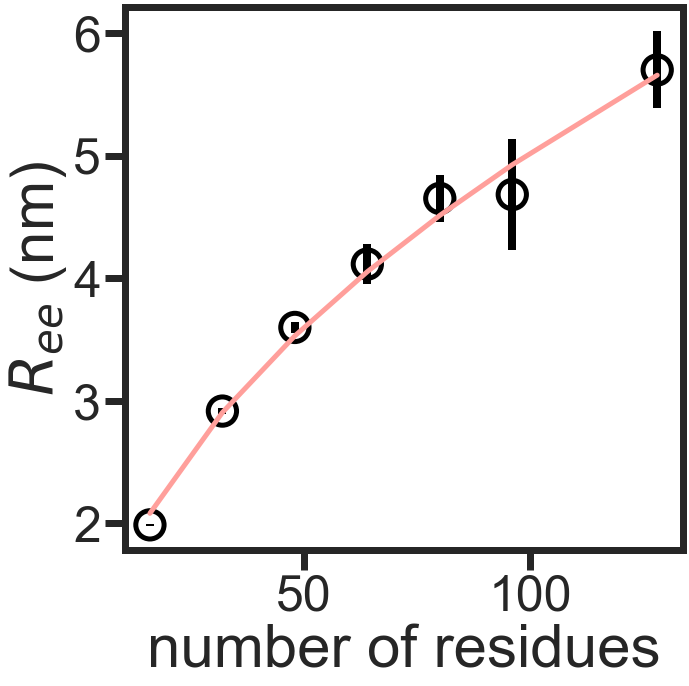

In [53]:
plt.ylabel('$R_{ee}$ (nm)')
plt.xlabel('number of residues')
plt.scatter(GS['length'],GS['Ree_buffer_value'], s=800,facecolors='none',color='black',linewidth=5)
plt.errorbar(GS['length'],GS['Ree_buffer_value'],yerr=GS['Ree_buffer_std'],linewidth=8,ls='',ms=30, color='black')
plt.plot(X,y_predict,'r')

In [54]:
df_plot=df_result[df_result['dataset']=='DisProt'].copy()

In [55]:
def save_to_svg(filename, root_path='F:\DATA_F\JPCB_fig_publish_svg'):
    plt.savefig(os.path.join(root_path,filename))


Text(0.5, 0, 'number of residues')

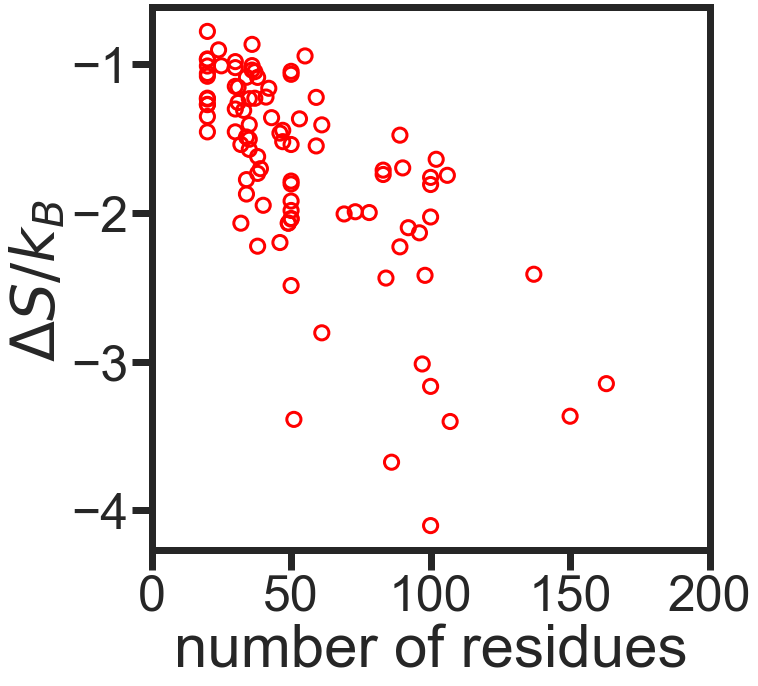

In [56]:
plt.scatter(df_plot['length'],df_plot['DS/k_buffer'],s=200,facecolors='None',edgecolor='red',linewidth=3)    
plt.xlim(0,200)
plt.ylabel('$\Delta S/k_B$ ')
plt.locator_params(axis='x',nbins=5)
plt.xlabel('number of residues')
#save_to_svg('Fig5A_double_check.svg')